# DS Workshop - Data Science with Python 

## Hierarchical clustering

**Author**: Philip Wilkinson, Head of Science (21/22), UCL DSS

**Date** 7th December 2021

***Proudly presented by the UCL Data Science Society***

### Introduction

Welcome to our XX workshop in the ***Data Science with Python*** series! 

In this workshop we will introduce you to the hierarchical clustering methodology as provided with the Scikit learn package. We will focus on introducing you to the London crime dataset, setting it up into the correct format so that we can run the algorithm and then implementing it and exploring the results.

## Hierarchical clustering

hierarchical clustering is part of the unsupervised learning models of machine learning. This means that we don't have a defined taregt variable unlike in traditional regression or classification tasks. The point of this machine learning algorithm therefore is to identify distinct clusters of objects that share similar characteristics by using defined distance metrics on the selected variables for the tasks. Other machine learning algorithsm that fit within this family include Kmeans or DBScan among others.

This specific algorithm comes in two main flavours or forms: top-down or bottom up. The first, top-down, starts by treating all points as a single cluster and then gradually breaks them up into seperate clusters (divissive) until they are all part of their own cluster. The second, bottom-up, starts from the basis that all points are part of their own cluster and then groups the two closest points together, iteratively, until they are all part of a single cluster (Agglomerative). This hierarchy of clutsers can be represented as a tree (or a dendrogram) as below. This leaves representing inidividual clusters and distance increasing as we go up the y-axis. This can be visualised as:

<img src="files/Img/Hierarchical_Clus_den.png"> 

<img src="files/Img/Hierarchical_Clus_plt.png">

The most common form of this is the Agglomerative method which is what we will use here. 

The outcome of the algorithm can be influenced by a variety of things, including the data and the method chosen, but two ways to set up the algorithm including the distance method chosen (how the distance between points is calculated) and the linkage method chosen (between which points the distance is calculated). If you want more information on this you can go to the following link [HERE](https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-1-theory-linkage-and-affinity-e3b6a4817702). For our purposes we will be using ...

The benefits of hierarchical clustering, in comparison to other methods of clusteirng, uis that it does not need the number of clusters to be specified, the algorithm is not that sensitive to the distance metric and it is useful when we expect a hierarchical structure for the data. However this comes at the cost of lower efficiency due to greater time complexity and there is no natural performance metric to be used.

In [1]:
!pip install geopandas
!pip install contextily

In [2]:
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx


### Application of the hierarchical clustering

The focus of the application of the hierarchical clustering methodology will be on London crime data as extracted from the London Data Store on crimes that cocur at the LSOA level. This level is chosen becuase they represent the most standardised unit in terms of the number of households that were available. This reduces some potential variance that could have occured as a result of non-standard geographical units. 

In [3]:
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/644a9e0d-75a3-4c3a-91ad-03d2a7cb8f8e/MPS%20LSOA%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")

We can inspect the data in a variety of ways:

In [4]:
crime.head(10)

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201911,201912,202001,202002,202003,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
0,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,0,0,3,0,0,...,1,1,0,0,1,1,0,0,0,0
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Burglary - Business and Community,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Burglary - Residential,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Drug Trafficking,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Possession of Drugs,0,0,1,3,0,...,0,2,3,1,0,0,0,1,2,1
6,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,"Making, Supplying or Possessing Articles for u...",0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Obscene Publications,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Perverting Course of Justice,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Possession of False Documents,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
crime.tail(10)

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201911,201912,202001,202002,202003,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
103112,E01033746,Greenwich 038E,Greenwich,Robbery,Robbery of Business Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103113,E01033746,Greenwich 038E,Greenwich,Robbery,Robbery of Personal Property,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103114,E01033746,Greenwich 038E,Greenwich,Theft,Bicycle Theft,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
103115,E01033746,Greenwich 038E,Greenwich,Theft,Other Theft,0,0,1,2,1,...,0,0,0,0,1,0,0,1,0,0
103116,E01033746,Greenwich 038E,Greenwich,Theft,Theft from Person,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
103117,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Interfering with a Motor Vehicle,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
103118,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft from a Motor Vehicle,0,0,0,0,0,...,1,1,0,1,1,2,1,0,1,0
103119,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft or Taking of a Motor Vehicle,0,2,0,0,0,...,0,0,1,0,1,0,2,0,0,0
103120,E01033746,Greenwich 038E,Greenwich,Violence Against the Person,Violence with Injury,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
103121,E01033746,Greenwich 038E,Greenwich,Violence Against the Person,Violence without Injury,0,1,0,1,1,...,1,0,1,1,0,3,0,2,0,1


In [6]:
crime.describe()

,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
count,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,...,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000,103122.000000
mean,0.734198,0.700762,0.713660,0.682522,0.612915,0.457148,0.536597,0.581341,0.658201,0.659539,...,0.490439,0.485541,0.573486,0.567755,0.620644,0.639699,0.651714,0.612411,0.634123,0.667743
std,2.883112,3.026296,2.608079,2.875785,2.000911,1.073926,1.224835,1.332962,1.667692,1.809183,...,1.144216,1.150672,1.292771,1.425248,1.731347,1.816982,2.027375,1.907398,1.956682,2.424782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,278.000000,366.000000,245.000000,273.000000,196.000000,60.000000,67.000000,72.000000,104.000000,142.000000,...,31.000000,39.000000,40.000000,88.000000,164.000000,156.000000,163.000000,149.000000,182.000000,246.000000


In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103122 entries, 0 to 103121
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   LSOA Code       103122 non-null  object
 1   LSOA Name       103122 non-null  object
 2   Borough         103122 non-null  object
 3   Major Category  103122 non-null  object
 4   Minor Category  103122 non-null  object
 5   201911          103122 non-null  int64 
 6   201912          103122 non-null  int64 
 7   202001          103122 non-null  int64 
 8   202002          103122 non-null  int64 
 9   202003          103122 non-null  int64 
 10  202004          103122 non-null  int64 
 11  202005          103122 non-null  int64 
 12  202006          103122 non-null  int64 
 13  202007          103122 non-null  int64 
 14  202008          103122 non-null  int64 
 15  202009          103122 non-null  int64 
 16  202010          103122 non-null  int64 
 17  202011          103122 non-nu

The three main things to take away from this are that:

1. There are 103,122 observations that are all non-null, meaning that data cleanup should be relatively easy.
2. The data is split into months for 2019 and 2020 meaning that we could take a look at individual months in terms of crime data, or if we want to look at a single year than then data would have to be aggregated.
3. There are major types of crime and minor types of crime.

For our purpose, 1 means that the data cleaning is relaively simple, 2 means that since we want to focus on a single year the data needs to be aggregated, but 3 warrants further inspection.

In [8]:
major_cats = crime["Major Category"].unique()
minor_cats = crime["Minor Category"].unique()

print(f"There are {len(major_cats)} Major crime categories",
     "There are:\n",
     major_cats)

print(f"There are {len(minor_cats)} Minor crime catgeories",
     "These are:\n",
     minor_cats,
      "\n"
     )

There are 10 Major crime categories There are:
 ['Arson and Criminal Damage' 'Burglary' 'Drug Offences'
 'Miscellaneous Crimes Against Society' 'Possession of Weapons'
 'Public Order Offences' 'Robbery' 'Theft' 'Vehicle Offences'
 'Violence Against the Person']
There are 52 Minor crime catgeories These are:
 ['Arson' 'Criminal Damage' 'Burglary - Business and Community'
 'Burglary - Residential' 'Drug Trafficking' 'Possession of Drugs'
 'Making, Supplying or Possessing Articles for use i'
 'Obscene Publications' 'Perverting Course of Justice'
 'Possession of False Documents'
 'Possession of Article with Blade or Point'
 'Public Fear Alarm or Distress'
 'Racially or Religiously Aggravated Public Fear, Al'
 'Robbery of Personal Property' 'Other Theft' 'Theft from Person'
 'Interfering with a Motor Vehicle' 'Theft from a Motor Vehicle'
 'Theft or Taking of a Motor Vehicle' 'Violence with Injury'
 'Violence without Injury' 'Dangerous Driving'
 'Fraud or Forgery Associated with Driver Recor

In [9]:
#we can then see how they group i.e. are minor crime specific subsets or are they seperate groups
crime_type = crime.groupby(["Major Category", "Minor Category"]).agg({"LSOA Code":"count"})
crime_type

LSOA Code
Major Category                       Minor Category                                               
Arson and Criminal Damage            Arson                                                    1938
                                     Criminal Damage                                          4827
Burglary                             Burglary - Business and Community                        4014
                                     Burglary - Residential                                   4829
Drug Offences                        Drug Trafficking                                         3144
                                     Possession of Drugs                                      4757
Miscellaneous Crimes Against Society Absconding from Lawful Custody                             52
                                     Aiding Suicide                                              2
                                     Bail Offences                                              63
                                     Bigamy                                                     24
                                     Dangerous Driving                                         692
                                     Disclosure, Obstruction, False or Misleading State         73
                                     Exploitation of Prostitution                               38
                                     Forgery or Use of Drug Prescription                       100
                                     Fraud or Forgery Associated with Driver Records           129
                                     Going Equipped for Stealing                               664
                                     Handling Stolen Goods                                     882
                                     Making, Supplying or Possessing Articles for use i        600
                                     Obscene Publications                                     3006
                                     Offender Management Act                                    29
                                     Other Forgery                                             847
                                     Other Notifiable Offences                                1262
                                     Perjury                                                    12
                                     Perverting Course of Justice                              879
                                     Possession of False Documents                             358
                                     Profitting From or Concealing Proceeds of Crime           835
                                     Soliciting for Prostitution                                29
                                     Threat or Possession With Intent to Commit Crimina       2626
                                     Wildlife Crime                                              7
Possession of Weapons                Other Firearm Offences                                    105
                                     Other Knife Offences                                        4
                                     Possession of Article with Blade or Point                2536
                                     Possession of Firearm with Intent                         499
                                     Possession of Firearms Offences                           829
                                     Possession of Other Weapon                               2460
Public Order Offences                Other Offences Against the State, or Public Order        3694
                                     Public Fear Alarm or Distress                            4790
                                     Racially or Religiously Aggravated Public Fear, Al       4159
                                     Violent Disorder                                          106
Robbery                       

What this shows is that there are a large number of minor crimes while there are only 10 major crime categories. If we were to focus on the large number of minor categories the clusters may be difficult to interpret because of the variability in terms of the number of LSOAs within each category and high dimensionality of the data that would result in many features being used. Therefore, the focus of this is on the major categories as that is what we are interested in and would lead to greater interpretability. 

We can also see that from above the columns are for each month in 2019 and 2020. Our interest here is to idnetify crime clusters over a single year and since 2020 was the year of covid we want to inspect the year 2019 first. For this we have to sum all columns from each year into a single column as below:

In [10]:
cols_to_sum_19 = [col for col in crime.columns if "2019" in str(col)]
cols_to_sum_20 = [col for col in crime.columns if "2020" in str(col)]

crime["2019"] = crime[cols_to_sum_19].sum(axis = 1)
crime["2020"] = crime[cols_to_sum_20].sum(axis = 1)

We can then extract only the data that we need in term of each LSOA the count of each major category in 2019. We can do this as follows:

In [11]:
#drop the 2019 column but do so iin creating a new 2019 labelled dataframe
crime_2019 = crime.drop(columns = ["2020"]).copy()

In [12]:
#use the pivot table function, set index to LSOA, column names to be the major categories, and values from the 2019 column
#we want to agg by the sum and we want to fill any empty values with a zero
crime_2019 = crime_2019.pivot_table(index= 'LSOA Code', columns = 'Major Category', 
                                    values = "2019", aggfunc = np.sum,
                                    fill_value = 0).reset_index()
#then rename the axis
crime_2019.rename_axis(None,axis=1, inplace=True)

A total crime column should also be created, as if we focus on the absolute number of crimes then there would be some types of cimre that have greater variation and thus the clustering algorithm would focus on this result and the outputs may be difficult to interpret. Thus, a total column is created with each crime type divided by the total amount of crime so that we get the percentage of crime that occurs within an area of that category, rather than focusing on areas that may have relatively high absolute levels of crime (if you wanted to you could include this as part of the clustering algorithm as long as you control for it).

In [13]:
#extract the columns to sum
cols_to_sum = [col for col in crime_2019.columns if "LSOA" not in col]
#sum across the columns rather than rows
crime_2019["Total_crime"] = crime_2019[cols_to_sum].sum(axis=1)

In [14]:
#we then want to turn the previous columns into percentages
#do this by dividing over the total crime columns
for col in cols_to_sum:
    crime_2019[col] = crime_2019[col]/crime_2019["Total_crime"]

To check the result we can try to map this to see what we get:

In [15]:
#load in the LSOA map 
UK_LSOA = gpd.read_file("https://opendata.arcgis.com/datasets/1f23484eafea45f98485ef816e4fee2d_0.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D")
#extract only the necessary information
UK_LSOA = UK_LSOA[["LSOA11CD", "geometry"]]

In [16]:
#merge the crime data with the LSOA file to 
#create the London-crime dataframe
London_crime = UK_LSOA.merge(crime_2019, 
                             left_on = "LSOA11CD", 
                             right_on = "LSOA Code", 
                             how = "right")

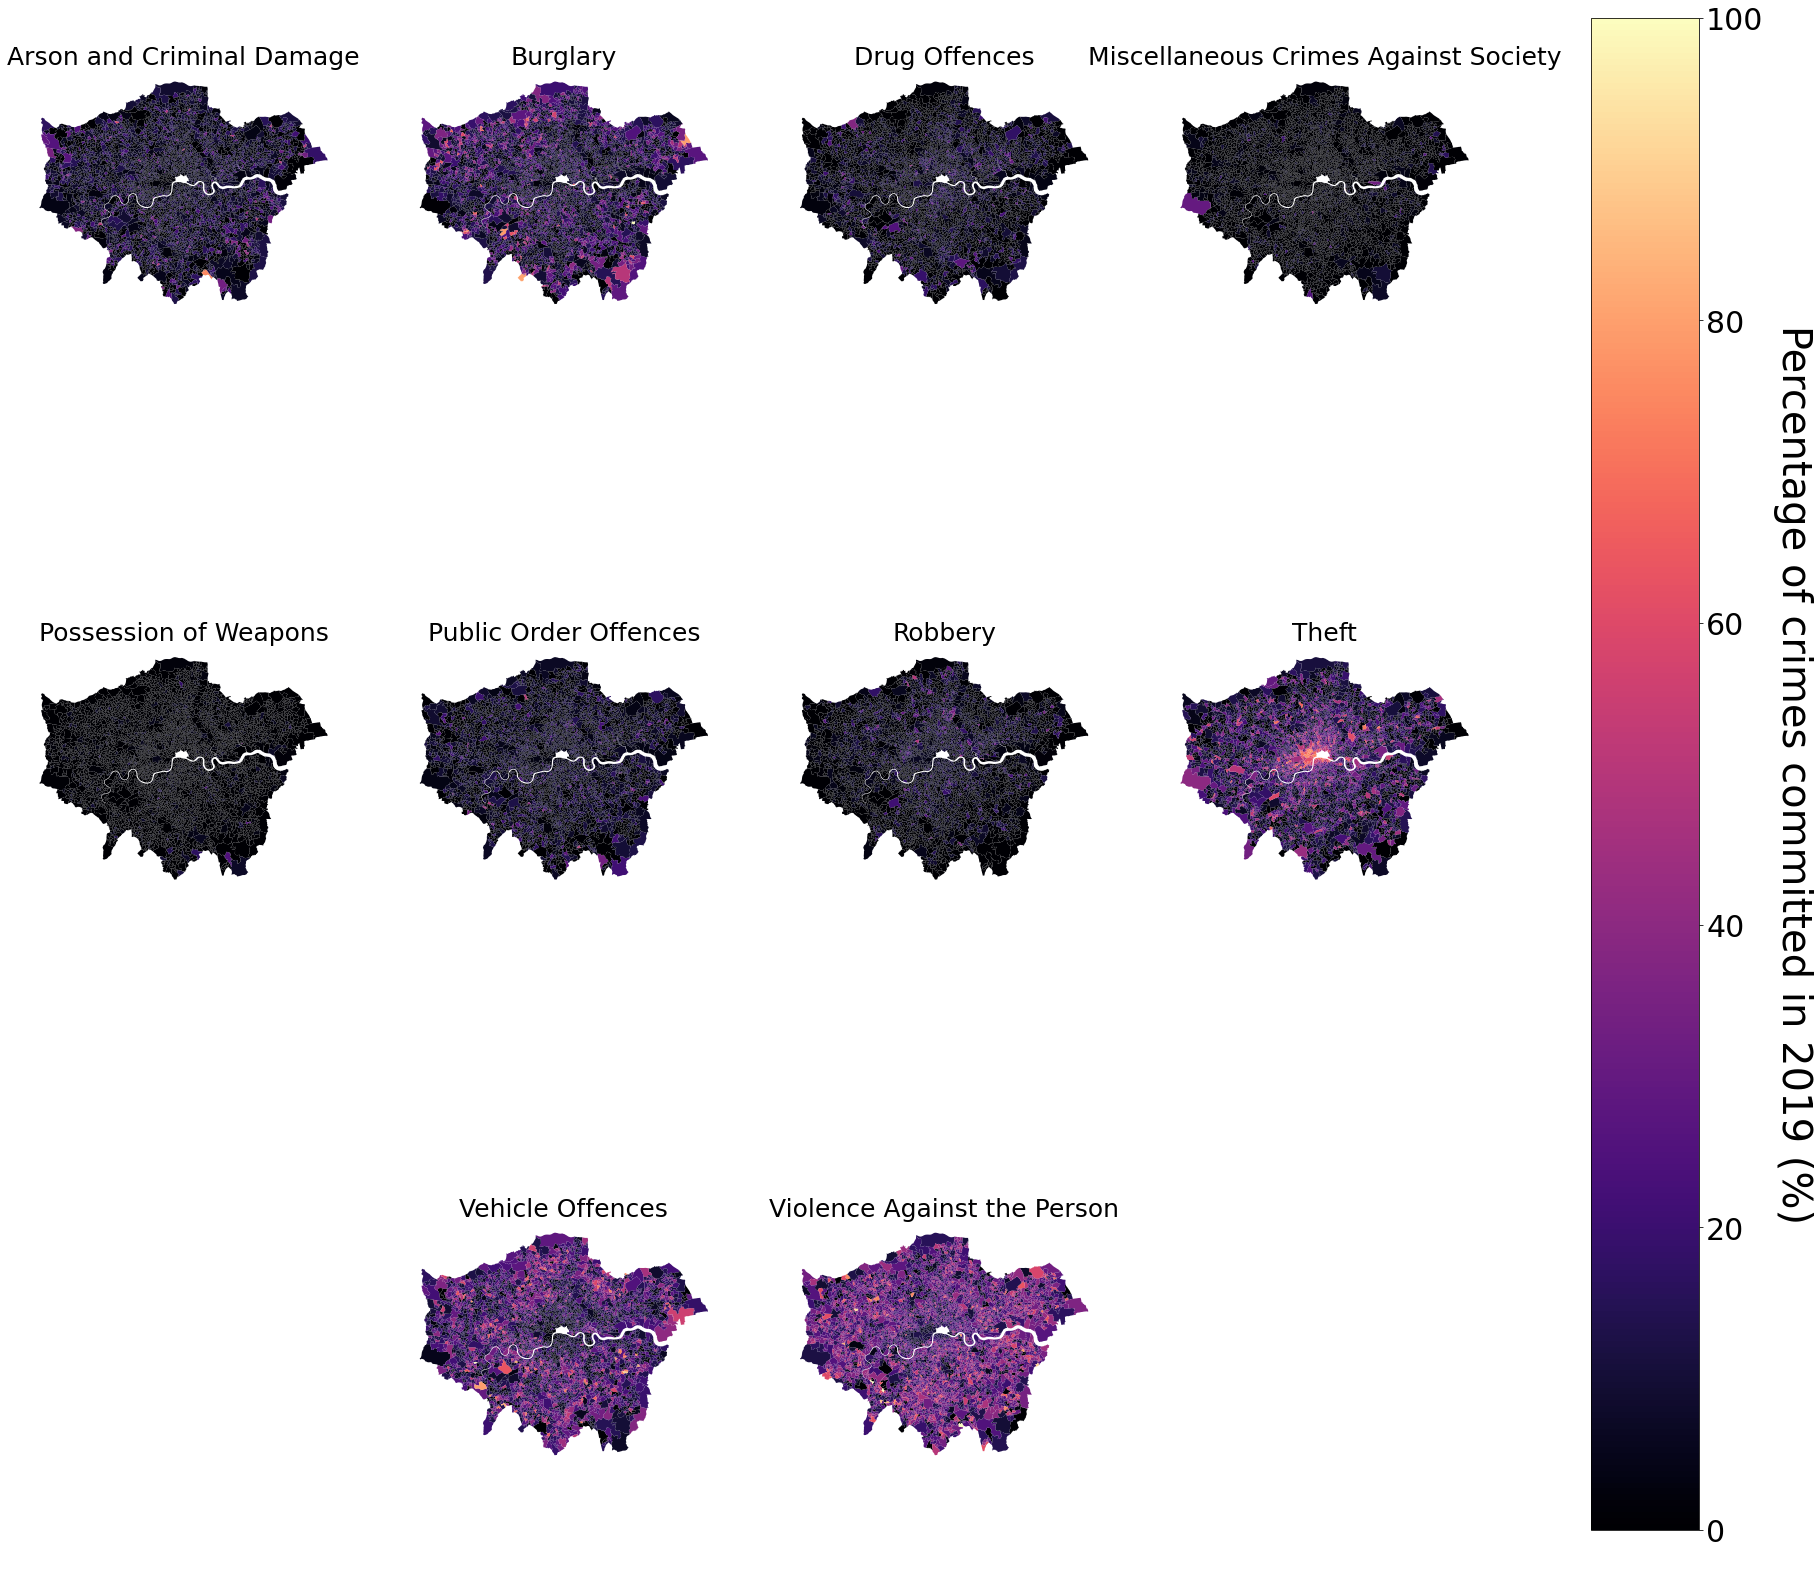

In [17]:
#we then want to map the result

#extract the columns that we don't want to plot
not_plot = ["LSOA11CD", "geometry", "LSOA Code", "Total_crime"]
#use this to extract the columns that we do want to plot
to_plot = [col for col in London_crime.columns if col not in not_plot]

#print(to_plot)

#create a subplot axis, given that we have 10 different categories this has to be a 3 by 4 matrix of plots
fig, axis = plt.subplots(3,4, figsize = (30,30))
#flatten the axis so that we can iterate over them
axis = axis.flatten()

#creating the plot function
#use the enumerate to get the value and its index
for i, col in enumerate(to_plot):
    #set the axis as in the rows
    ax = axis[i]
    #to make it cleaner move two axis across
    if i >=8:
        ax = axis[i+1]
    #plot the crime map using the magma color map
    crim_plt = London_crime.plot(column = col, ax=ax, cmap = "magma", vmin =0, vmax = 1)
    #remove the axis so that it looks cleaner
    ax.set_axis_off()
    #set the plot title as the column name
    ax.set_title(col, fontsize = 25)

    
#plt.subplots_adjust(right = 0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#cbar = plt.colorbar(cax=cbar_ax)

#adding a color bar for the overall plto
#https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
vmin, vmax = 0,100

#create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Percentage of crime")
#create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)
#change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
#set the label title
#https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Percentage of crimes committed in 2019 (%)", rotation = 270, fontsize= 40, labelpad = 50)
#
#cax.tight_layout()

#remove axis of plots not covered
axis[8].set_axis_off()
axis[11].set_axis_off()
#show the results
plt.show()

What this plot tells us that four main categories of Burlgary, Theft, Vehicle Offence and Violence Against the Person appear to have the greater variance in values and also the largest values in terms of percentages. What this means is that the clustering algorithm may be likely to focus on these four factors because of this. However, since we are concerned with identify clusters that are dominated by a type of crime, any further standardising/normalising may remove valuable informagtion that we are interested in, thus this variance is accepeted at the current moment (you can try to perform standardisation before continuining to see how the results may change).

Therefore, we can attempt to cluster the results to see how the clusters develop:

In [18]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

In [19]:
#extract the values that we want to cluster on
crime_clus = London_crime[to_plot]

In [20]:
#create the model that we want, setting the linkage to ward, the distance threshold to 4 and 
#set the number of clusters to none so that we can plot the dendrogram afterwards
model = AgglomerativeClustering(linkage="ward", 
                                distance_threshold = 7, 
                                n_clusters=None)
#fit the model to the data
model.fit(crime_clus)

AgglomerativeClustering(distance_threshold=7, n_clusters=None)

Once the model has been fit to the data we want to actually visualise the results in how this maps into London. The first thing we want to do is to extract the labels and then add them to our original dataframe:

In [21]:
London_crime["Aggl_clus"] = model.labels_

We can then plot the results in London:

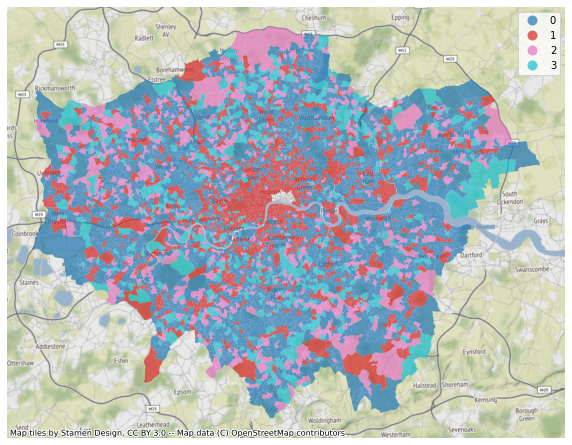

In [22]:
fig, ax = plt.subplots(figsize = (10,10))

London_crime.plot(column = "Aggl_clus", 
                  categorical = True, 
                  legend=True, 
                  ax=ax,
                  alpha = 0.7,
                 cmap = "tab10")


cx.add_basemap(ax = ax,
               crs = "EPSG:27700")

ax.set_axis_off()

What we can see here is that with the distance threshold set to value 7, we get 4 clusters which are distributed across London. What it appears is that cluster 1 is dominated in the central of London but there are small patches across the rest of London. Cluster 2 tends to be found sporadically on the edge of London along with cluster 3 while Cluster 0 appears to be distributed across the whole of London.

What we need to know next then is what do these clusters mean and how do they compare to each other in terms of the percentage of crime between each clutser. This can be done by visualising the means of each of these clusters (we could also use the distribution of values within these clusters) which would allow us to assign labels to interpret them:

In [23]:
agglom_means =London_crime.groupby("Aggl_clus")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

#agglom_means_T.reset_index(inplace=True)
agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T

Aggl_clus,0,1,2,3
Arson and Criminal Damage,0.087,0.049,0.064,0.063
Burglary,0.094,0.086,0.319,0.124
Drug Offences,0.055,0.048,0.031,0.028
Miscellaneous Crimes Against Society,0.015,0.010,0.009,0.010
Possession of Weapons,0.008,0.007,0.006,0.004
Public Order Offences,0.060,0.057,0.044,0.037
Robbery,0.044,0.051,0.029,0.029
Theft,0.119,0.377,0.072,0.078
Vehicle Offences,0.165,0.119,0.199,0.452
Violence Against the Person,0.353,0.195,0.229,0.174


C:\Users\phili\AppData\Local\Temp/ipykernel_12716/156790537.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)


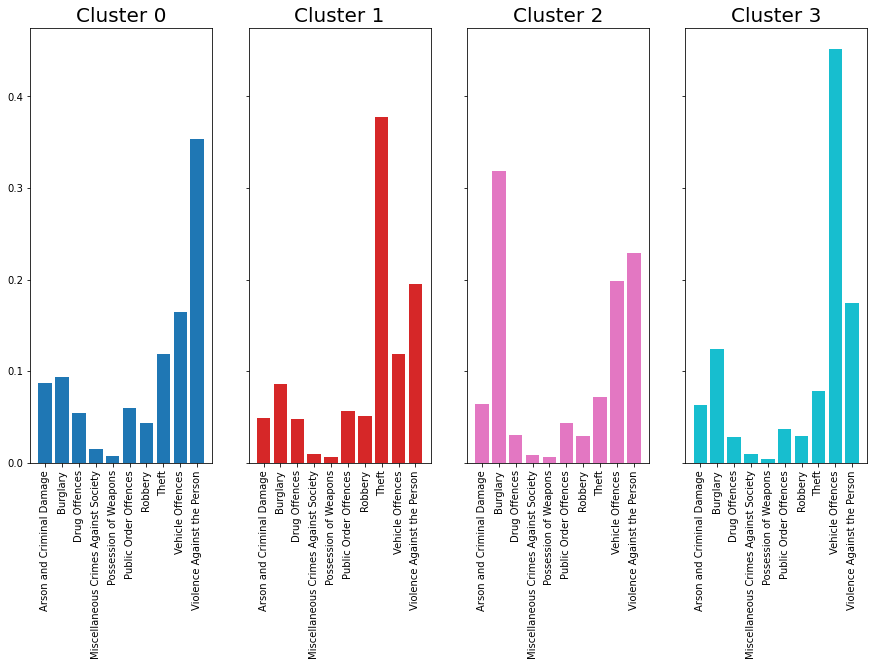

In [24]:
agglom_means_T.reset_index(inplace=True)

#get the colours
colors = ["#1f77b4", "#d62728", "#e377c2", "#17becf"]

#create subplots for each cluster
fig, ax = plt.subplots(1,4, figsize = (15,8), sharey = True, sharex = True)
#flatten the axis
axis = ax.flatten()

#going over each column
for i, col  in enumerate(agglom_means_T.columns):
    #ignore the index column
    if col != "index":
        ax = axis[i-1]
        #plot the bar chart
        ax.bar(height = agglom_means_T[col], x=agglom_means_T["index"], color = colors[i-1] )
        #rotate the x-ticks
        ax.set_xticklabels(labels =agglom_means_T["index"], rotation = 90)
        #set the title
        ax.set_title(f"Cluster {col}", fontsize = 20)

From this we can see that Cluster 0 on average has relatively high Violence Against the Person, and Arson and Crimilar Damage and Drug offences compared to the others. Clyster 1 is dominated by sintances of Theft with relatively low Vehical offences. Cluster 2 is dominated by Burglarly while cluster 3 is dominated by Vehicle offences suggesting differing natures of crimes in each area.

Based on this we could assign labels such that:

- <b>Cluster 1</b>: Violence Against the Person
- <b>Cluster 2</b>: Theft
- <b>Cluster 3</b>: Burglarly
- <b>Cluster 4</b>: Vehical Offences

A good indicator of whether this clustering has performed well is the sizes of the clusters, where if one cluster dominates then it suggests that the clustering has not necessarily performed well (although this could be expected). We can see this as:

In [25]:
agglom_sizes = London_crime.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0    2455
1    1083
2     651
3     640
dtype: int64

Where we cans see cluster 0 dominates, which suggests potentially this could be broken up depending on how the hierarchy is constructed. 

Given that this is hierarchical clustering, we can aim to see how the model has behaved using the dendrogram. This shows the hierarhcial structure in terms of how the model behaves and can be implemented with the following code:

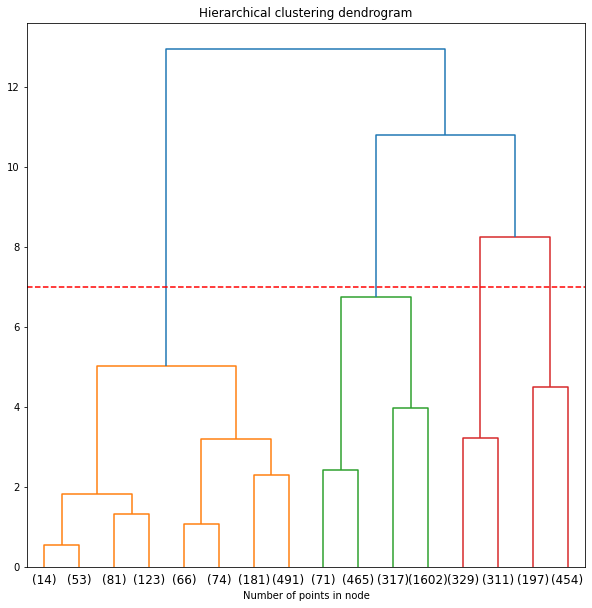

In [26]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

What this shows is that with the current distance measure we get four clusters, however we can see that at a slightly greater distance three clusters emerge rather than 4, or at a slightly smaller distance then five clusters may emerge. We can add more lines to the dendrogram to show this:

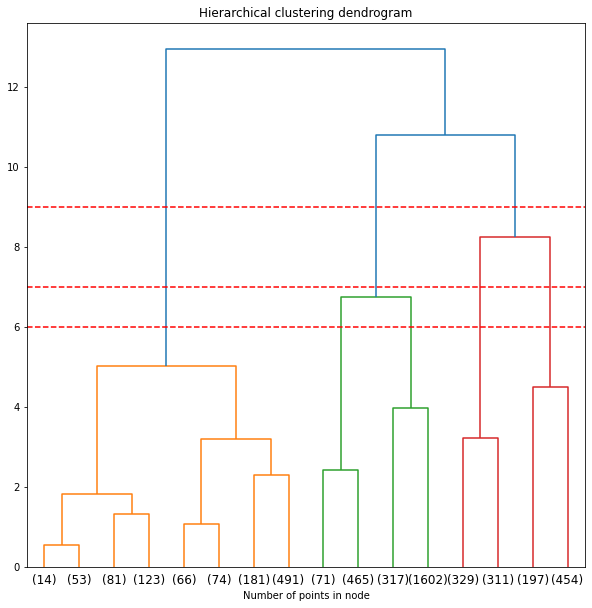

In [27]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 7, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 9, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

With this, you can explore in more detial how the clusters and their interpretability change with difference including standardisation, different distances or even different distance metrics. This can also include geographically constrained models that take into account the surrounding LSOAs into the model as can be seen [here](https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-3-spatial-clustering-1f8cbd451173).

You can try to apply what you have learnt so far in the problem worksheet as well. To make this easier, I would recommend exporting you current dataset as a csv as follows (or you can try extracting the 2020 dataset as well):

In [29]:
London_crime.to_file("Data/crime_2019.gpkg",
                     driver = "GPKG")